In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from environments.utils import create_data
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
train, test = create_data(start_='2000-01-01',end_='2023-04-13',scale_min_max=False)

In [3]:
train

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,9.318000e+08,-1.391598e+08,100.000000,-31.517570,26.342128,0.081278,...,-36.523160,1435.604009,-5.630213e+10,1435.919922,0.000000,1.000000,0.571268,0.820763,0.051620,0.998667
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1.009000e+09,-1.078670e+09,100.000000,-31.517570,26.342128,0.081278,...,-36.523160,1435.604009,-5.630213e+10,1435.919922,0.781831,0.623490,0.724793,0.688967,0.068802,0.997630
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1.085500e+09,-6.739360e+08,100.000000,-31.517570,26.342128,0.081278,...,-36.523160,1435.604009,-5.338219e+10,1435.919922,0.974928,-0.222521,0.848644,0.528964,0.085965,0.996298
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1.092300e+09,-5.139585e+08,100.000000,-31.517570,26.342128,0.081278,...,-36.523160,1435.604009,-5.191855e+10,1435.919922,0.433884,-0.900969,0.937752,0.347305,0.103102,0.994671
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1.225200e+09,7.112415e+08,100.000000,-31.517570,26.342128,0.081278,...,-36.523160,1435.604009,-5.336422e+09,1435.919922,-0.433884,-0.900969,0.988468,0.151428,0.120208,0.992749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-08,2856.790039,2862.439941,2853.090088,2857.699951,2.978070e+09,1.481261e+12,11.879785,54.643525,19.571394,0.028649,...,-8.390653,2840.982883,2.051656e+12,2847.983232,0.974928,-0.222521,0.998717,-0.050649,-0.601624,-0.798779
2018-08-09,2857.189941,2862.479980,2851.979980,2853.580078,3.066180e+09,1.479130e+12,11.823401,60.511726,19.629255,0.029281,...,-14.423558,2845.361339,2.039024e+12,2850.855604,0.433884,-0.900969,0.968077,-0.250653,-0.615285,-0.788305
2018-08-10,2838.899902,2842.199951,2825.810059,2833.280029,3.265590e+09,1.478841e+12,11.631424,58.314783,20.650670,0.028381,...,-44.939592,2844.907340,1.972732e+12,2848.606300,-0.433884,-0.900969,0.897805,-0.440394,-0.628763,-0.777597


In [4]:
# calculate intersect over union of ranges of values in train and test for every column
def iou(train_, test_):
    iou = []
    for col in train_.columns:
        train_range = train_[col].max() - train_[col].min()
        test_range = test_[col].max() - test_[col].min()
        intersect = max(min(train_[col].max(), test_[col].max()) - max(train_[col].min(), test_[col].min()),0)
        union = train_range + test_range - intersect
        iou.append((col, intersect / union))
    return iou

('DYMI', 1.0)
('EVSTC', 1.0)
('SQZMI', 1.0)
('STC', 1.0)
('STOCH', 1.0)
('WILLIAMS', 1.0)
('sin_weekday', 1.0)
('cos_weekday', 1.0)
('sin_monthday', 1.0)
('cos_monthday', 1.0)
('sin_yearday', 1.0)
('cos_yearday', 1.0)
('BOP', 0.9979898065135291)
('STOCHD', 0.995317256617584)
('IFT_RSI', 0.9897615710467186)
('ER', 0.9681041058461901)
('PZO', 0.9646994227518653)
('BBWIDTH', 0.9474363702999118)
('FVE', 0.9432392871116955)
('ROC', 0.9285379521660487)
('VZO', 0.9285224296463555)
('PERCENT_B', 0.9237131804203808)
('UO', 0.9224985923927684)
('TRIX', 0.9109208721186449)
('CCI', 0.9056750516101221)
('MI', 0.9045329345898863)
('MFI', 0.8786060260191438)
('COPP', 0.8632400781499523)
('CMO', 0.8573665144283614)
('FISH', 0.7885645010480463)
('volume', 0.7819698094441881)
('VFI', 0.7585376014575123)
('CHAIKIN', 0.7562860790292699)
('RSI', 0.752620619862348)
('STOCHRSI', 0.7461233443713902)
('EMV', 0.6608671899339579)
('CFI', 0.6515889532440401)
('WOBV', 0.6351190204293674)
('VBM', 0.5546643454249051

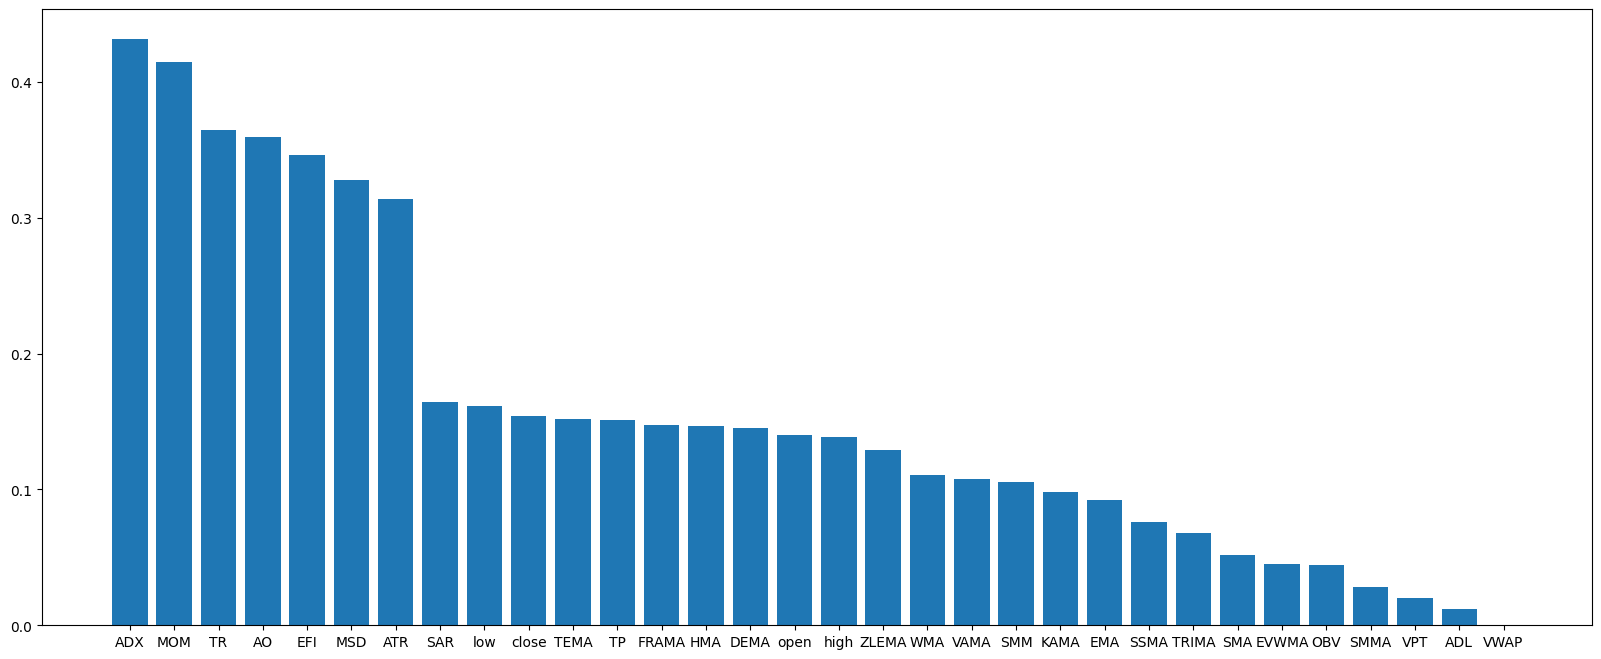

In [5]:
# sort columns by iou and print their iou values and names
# plot sorted values in a bar chart
iou_ = iou(train, test)
iou_.sort(reverse=True, key=lambda x: x[1])
for i in iou_:
    print(i)
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar([i[0] for i in iou_ if i[1] < 0.5], [i[1] for i in iou_ if i[1] < 0.5])
plt.show()

In [33]:
# take the last 6 months and calculate the mean and std of each column
# then scale those 6 months to std with calculated mean and std
# move over one day and repeat
def scale_to_std_using_sliding_windows(train_df, test_df, window_len=6 * 30):
    train_ = train_df.copy()
    test_ = test_df.copy()
    whole_df = pd.concat([train_, test_])
    for i in range(window_len-1, len(train_)):
        train_temp = whole_df.iloc[i-window_len+1:i+1]
        std_ = train_temp.std()
        mean_ = train_temp.mean()
        train_temp = (train_temp - mean_) / std_
        train_.iloc[i-window_len+1:i+1] = train_temp
    for i in range(window_len-1, len(test_)):
        test_temp = whole_df.iloc[len(train_)+i-window_len+1:len(train_)+i+1]
        std_ = test_temp.std()
        mean_ = test_temp.mean()
        test_temp = (test_temp - mean_) / std_
        test_.iloc[i-window_len+1:i+1] = test_temp
    return train_, test_

In [34]:
train_std_180, test_std_180 = scale_to_std_using_sliding_windows(train, test)

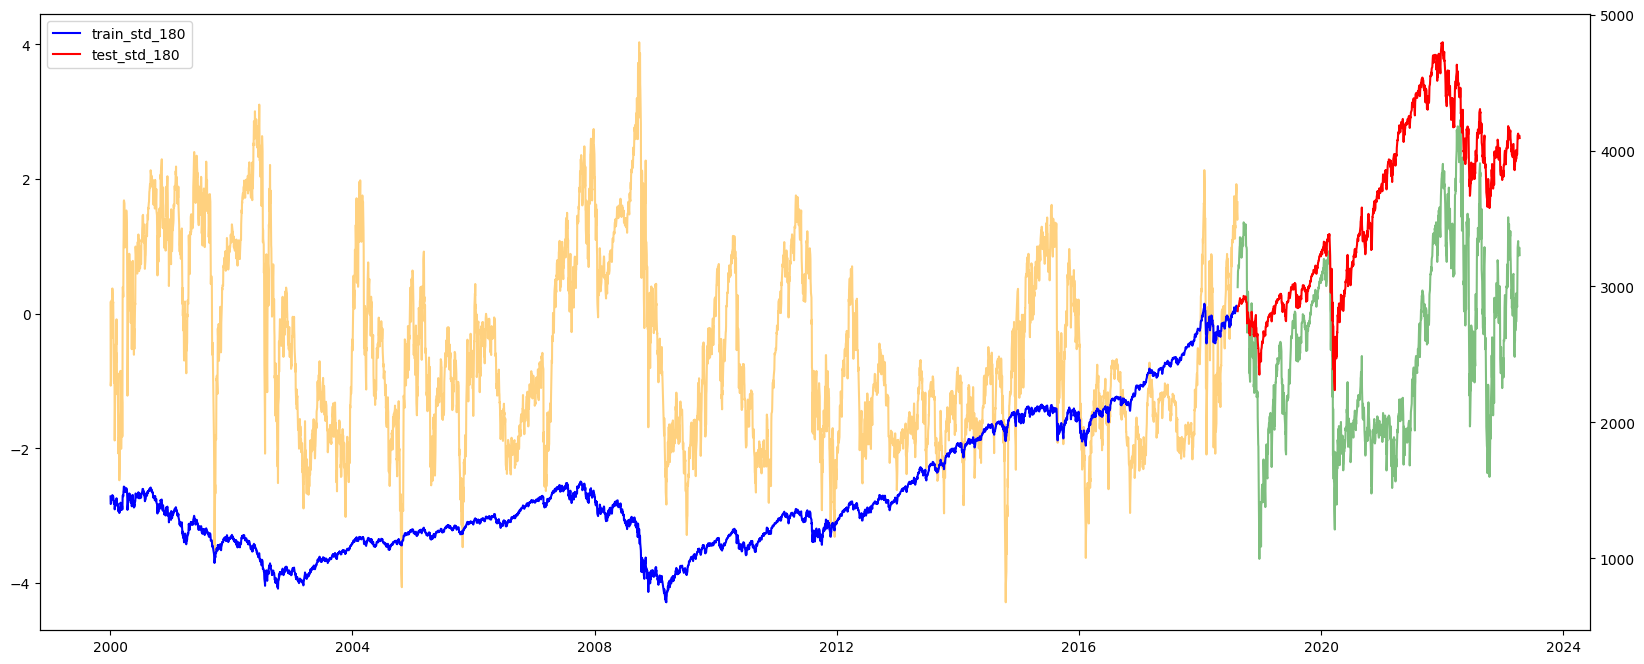

In [35]:
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
ax2.plot(train['close'], color='blue')
ax2.plot(test['close'], color='red')
ax1.plot(train_std_180['close'], color='orange', alpha=0.5)
ax1.plot(test_std_180['close'], color='green', alpha=0.5)

plt.legend(['train_std_180', 'test_std_180', 'train', 'test'])

In [36]:
train_std_180.to_json('train_std_180.json')
test_std_180.to_json('test_std_180.json')

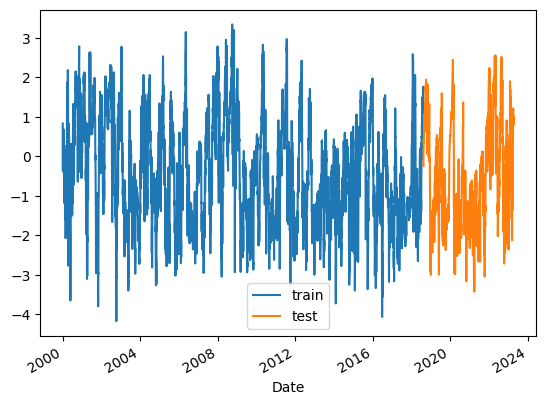

In [43]:
train_std_60, test_std_60 = scale_to_std_using_sliding_windows(train, test, 60)
train_std_60['close'].plot()
test_std_60['close'].plot()
plt.legend(['train', 'test'])

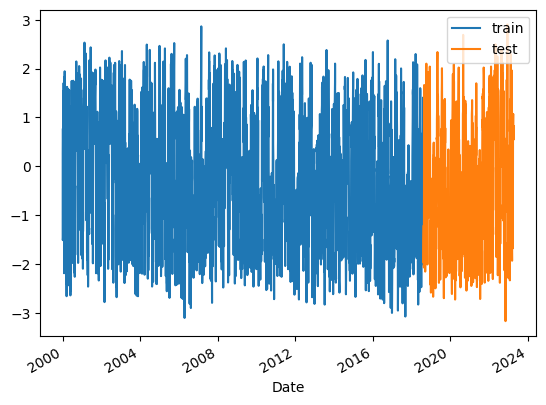

In [44]:
train_std_14, test_std_14 = scale_to_std_using_sliding_windows(train, test, 14)
train_std_14['close'].plot()
test_std_14['close'].plot()
plt.legend(['train', 'test'])

('STC', 1.0)
('ZLEMA', 1.0)
('sin_weekday', 1.0)
('cos_weekday', 1.0)
('cos_monthday', 1.0)
('sin_yearday', 1.0)
('EVSTC', 0.9999999999999266)
('TEMA', 0.9943474735451098)
('VAMA', 0.9928342224959064)
('FVE', 0.9920826341852074)
('SSMA', 0.9913602953026731)
('sin_monthday', 0.9894376455419918)
('ATR', 0.9850293757171673)
('SMM', 0.9827887841332201)
('EMA', 0.982602860457732)
('MSD', 0.9815845346500276)
('IFT_RSI', 0.9802037205420003)
('SMA', 0.9791052931026388)
('KAMA', 0.9775122657586525)
('FRAMA', 0.9771462353597593)
('WMA', 0.9749720435154068)
('ADX', 0.9717915717404859)
('CHAIKIN', 0.9711888091450205)
('volume', 0.9679370487803942)
('STOCHRSI', 0.9656901231675664)
('CCI', 0.9652710382538429)
('ADL', 0.962495840042597)
('BOP', 0.9624506239497974)
('EVWMA', 0.9619330998388348)
('MFI', 0.9612235976391718)
('STOCHD', 0.9612098843199331)
('cos_yearday', 0.9604357731321002)
('DYMI', 0.9595664689090541)
('VBM', 0.9577697908450208)
('VFI', 0.9556799353517205)
('TR', 0.9537832248102792)
('P

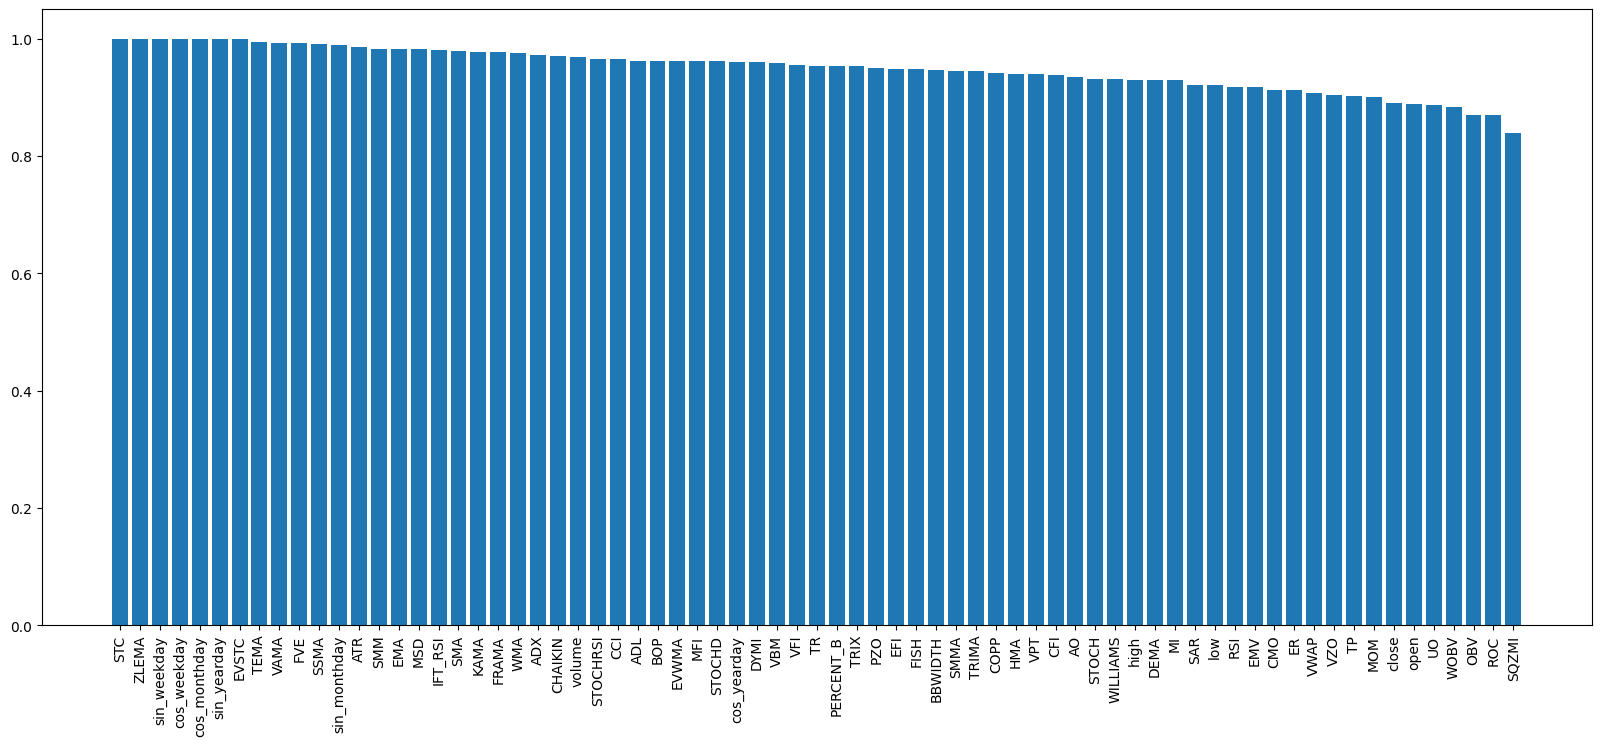

In [14]:
# sort columns by iou and print their iou values and names
# plot sorted values in a bar chart
iou_ = iou(train_std_14, test_std_14)
iou_.sort(reverse=True, key=lambda x: x[1])
for i in iou_:
    print(i)
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar([i[0] for i in iou_], [i[1] for i in iou_])
plt.xticks(rotation=90)
plt.show()

In [4]:
import math

In [5]:
def get_weights(win_size=6 * 30):
    sigma = win_size/5
    value_at_one = 50
    arr = np.array([max(int(value_at_one*math.exp(-(i**2)/(2*sigma**2))),1) for i in range(win_size)])
    print(arr)
    plt.plot(arr)
    plt.show()
    return arr

In [28]:
def scale_std_window_weighted(train_df, test_df, window_len=6 * 30):
    arr = get_weights(window_len)
    train_ = train_df.copy()
    test_ = test_df.copy()
    whole_df = pd.concat([train_, test_])
    for idx in tqdm(range(window_len - 1, len(train_df))):
        train_temp = whole_df.iloc[idx - window_len + 1:idx + 1].copy()
        train_temp2 = train_temp.copy().iloc[::-1]
        for j in range(len(arr)):
            for k in range(arr[j] - 1):
                train_temp2 = train_temp2.append(train_temp2.iloc[j])
        std_ = train_temp2.std()
        mean_ = train_temp2.mean()
        train_temp = (train_temp - mean_) / std_
        train_.iloc[idx - window_len + 1:idx + 1] = train_temp
    # for idx in tqdm(range(window_len - 1, len(test_df))):
    #     test_temp = whole_df.iloc[len(train_) + idx - window_len + 1:len(train_) + idx + 1].copy()
    #     test_temp2 = test_temp.copy().iloc[::-1]
    #     for j in range(len(arr)):
    #         for k in range(arr[j] - 1):
    #             test_temp2 = test_temp2.append(test_temp2.iloc[j])
    #     std_ = test_temp2.std()
    #     mean_ = test_temp2.mean()
    #     test_temp = (test_temp - mean_) / std_
    #     test_.iloc[idx - window_len + 1:idx + 1] = test_temp
    return train_, test_

[50 49 49 49 49 49 49 49 48 48 48 47 47 46 46 45 45 44 44 43 42 42 41 40
 40 39 38 37 36 36 35 34 33 32 32 31 30 29 28 27 26 26 25 24 23 22 22 21
 20 19 19 18 17 16 16 15 14 14 13 13 12 11 11 10 10  9  9  8  8  7  7  7
  6  6  6  5  5  5  4  4  4  3  3  3  3  3  2  2  2  2  2  2  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]


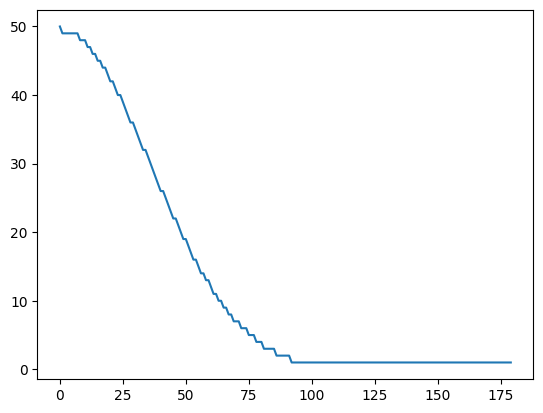

100%|██████████| 4505/4505 [2:19:41<00:00,  1.86s/it]  


In [29]:
train_180_window_weighted, _ = scale_std_window_weighted(train, test)

In [30]:
train_180_window_weighted.to_json('train_180_window_weighted.json')
# test_180_window_weighted.to_json('test_180_window_weighted.json')

In [31]:
test_180_window_weighted = pd.read_json('test_180_window_weighted.json')

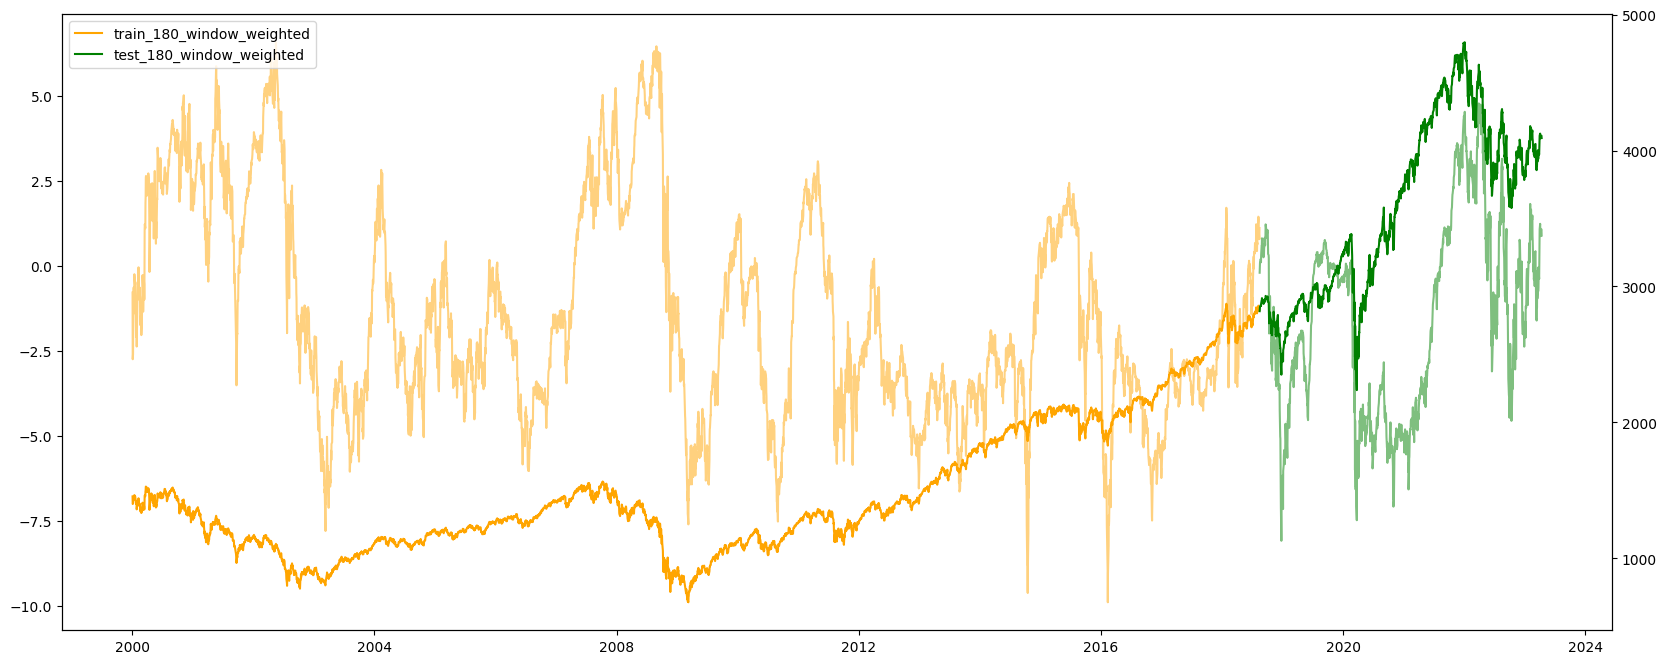

In [32]:
fig, ax1 = plt.subplots(figsize=(20, 8))
ax2 = ax1.twinx()
ax1.plot(train_180_window_weighted['close'], color='orange', alpha=0.5)
ax1.plot(test_180_window_weighted['close'], color='green', alpha=0.5)
ax2.plot(train['close'], color='orange')
ax2.plot(test['close'], color='green')
plt.legend(['train_180_window_weighted', 'test_180_window_weighted', 'train', 'test'])
# plt.legend(['test_180_window_weighted', 'test'])

In [11]:
train_180_window_weighted

In [12]:
train

In [7]:
train_180_window_weighted = pd.read_json('train_180_window_weighted.json')
test_180_window_weighted = pd.read_json('test_180_window_weighted.json')

<Axes: >

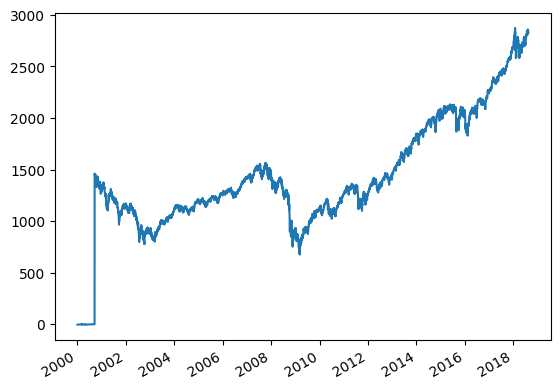

In [9]:
train_180_window_weighted

In [10]:
test_180_window_weighted

,open,high,low,close,volume,ADL,ADX,AO,ATR,BBWIDTH,...,WILLIAMS,WMA,WOBV,ZLEMA,sin_weekday,cos_weekday,sin_monthday,cos_monthday,sin_yearday,cos_yearday
2018-08-15,-1.395461,-1.261230,-1.408983,-1.706325,1.080076e+00,-9.373667e+00,0.129957,1.151068,-1.059614,0.214340,...,0.264701,-1.866568,-6.260873e-01,-1.412626,-0.723109,1.403300,2.712497e-01,-1.411929,1.203864e-01,5.429957
2018-08-16,-1.690225,-1.602845,-1.407065,-1.359635,1.215752e+00,-8.785290e+00,0.343129,1.168765,-1.107851,0.262404,...,0.882578,-1.776563,-2.867282e-01,-1.340642,0.795674,0.913398,-1.957321e-02,-1.411929,1.551436e-01,5.444342
2018-08-17,-1.347622,-1.572918,-1.258586,-1.293623,6.840652e-01,-8.111261e+00,0.549926,1.298667,-1.381734,-0.020528,...,0.904207,-1.684547,-2.265453e-01,-1.305278,1.170783,-0.187402,-3.044429e-01,-1.354816,1.900592e-01,5.457820
2018-08-20,-1.282389,-0.926605,-1.002819,-0.672606,1.375958e+00,-7.392944e+00,0.892413,1.427820,-0.855774,0.207435,...,1.523474,-1.468915,3.939068e-01,-1.174465,0.119752,-1.070175,-5.716969e-01,-1.242927,2.251228e-01,5.470385
2018-08-21,-0.668694,-0.848805,-0.633536,-0.698034,1.763458e+00,-7.154166e+00,1.226076,1.549632,-1.165831,-0.078988,...,1.358422,-1.290480,3.672571e-01,-1.050459,-1.565971,-1.070175,-8.103937e-01,-1.080843,2.603241e-01,5.482035
2018-08-22,-0.693822,-0.755055,-0.540133,-0.488753,-2.671626e-01,-6.555653e+00,1.554861,1.652765,-1.119900,-0.386072,...,1.550136,-1.090023,5.329130e-01,-0.923524,-0.723109,1.403300,-1.265600e+00,-0.368353,3.666494e-01,5.511456
2018-08-23,-0.487008,-0.555076,-0.272392,-0.338141,-7.998502e-01,-6.203139e+00,1.900422,1.838574,-1.375419,-0.132473,...,1.485902,-0.895357,6.419951e-01,-0.757196,0.795674,0.913398,-1.309639e+00,-0.087899,4.022966e-01,5.519411
2018-08-24,-0.338172,-0.582500,-0.224495,-0.434959,-3.940103e+00,-6.274005e+00,2.221301,1.996553,-1.579252,-0.037727,...,1.349136,-0.763672,6.102766e-01,-0.643093,1.170783,-0.187402,-1.294909e+00,0.195463,4.380289e-01,5.526436
2018-08-27,-0.433849,-0.479272,-0.161747,-0.344498,-4.751100e+00,-6.302061e+00,2.542080,2.073642,-1.877835,0.113032,...,1.377939,-0.639091,6.306458e-01,-0.493941,-1.565971,-1.070175,-1.093937e+00,0.724862,5.097067e-01,5.537686
2018-08-28,-0.344454,0.069797,-0.073139,0.320034,-1.232909e+00,-5.795785e+00,2.935683,2.167374,-1.594756,0.596597,...,1.550136,-0.398918,1.075589e+00,-0.259772,-0.723109,1.403300,-4.409780e-01,1.271729,6.175967e-01,5.547540
